In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, skewtest

/var/folders/m8/ss8240rn1_n5_crd6h3q40zc0000gn/T/ipykernel_45423/249758172.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_pickle('data/dataset/cleandata.pkl')
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


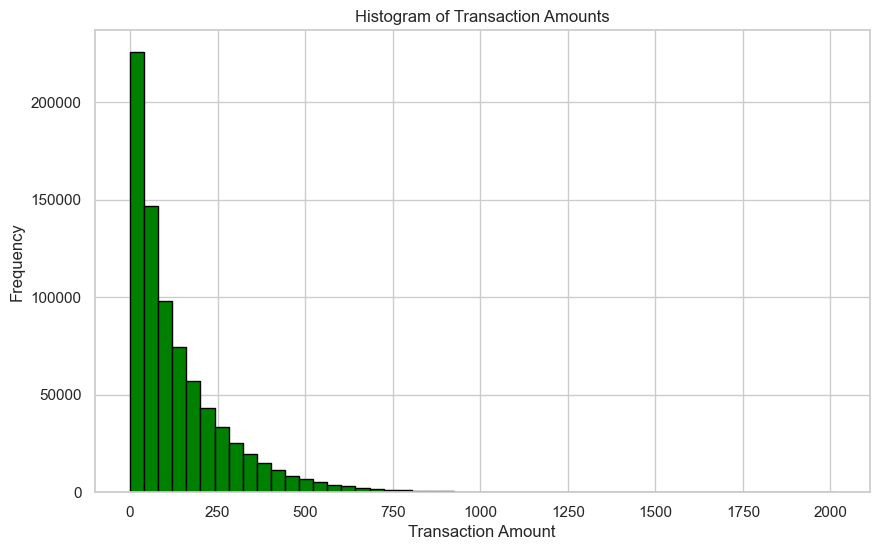

In [3]:
# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Plot a histogram of the 'transactionAmount' column
plt.figure(figsize=(10, 6))
plt.hist(df['transactionAmount'], bins=50, color='green', edgecolor='black')
plt.title('Histogram of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### Transaction Amount Hypotheses
* Right skewed (Positively Skewed Distribution)
* Most of transaction amount are between 0 and 250. Suggesting that the majority of transactions are of relatively smaller amounts. 
* There is a tail of transactions with higher amounts. Potential outliers on the higher end of the transaction amounts.
* The mean of transaction amounts is greater than the median. This is because the mean is sensitive to extreme values, and the right tail pulls it in the positive direction.
* The transaction amounts do not follow a normal distribution.
* Behavior of the distribution is really satisfying.

In [4]:
# Testing for normalitity of the distribution 
transactionAmount_data = df['transactionAmount'] 

# Perform the Shapiro-Wilk test
statistic, p_value = shapiro(transactionAmount_data)

# Print the results
print(f"Shapiro-Wilk Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The sample does not come from a normal distribution.")
else:
    print("Fail to reject the null hypothesis. The sample may come from a normal distribution.")

Shapiro-Wilk Statistic: 0.7978994888600236
P-value: 1.4771006162231685e-174
Reject the null hypothesis. The sample does not come from a normal distribution.


/var/folders/m8/ss8240rn1_n5_crd6h3q40zc0000gn/T/ipykernel_45423/1342911646.py:6: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 786363.
  statistic, p_value = shapiro(transactionAmount_data)


In [5]:
# Conduct the skewness test
test_statistic, p_value = skewtest(transactionAmount_data)

# Print the results
print(f"Skewness Test Statistic: {test_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The sample is significantly skewed.")
else:
    print("Fail to reject the null hypothesis. There is no significant skewness.")

Skewness Test Statistic: 493.69776694767336
P-value: 0.0
Reject the null hypothesis. The sample is significantly skewed.


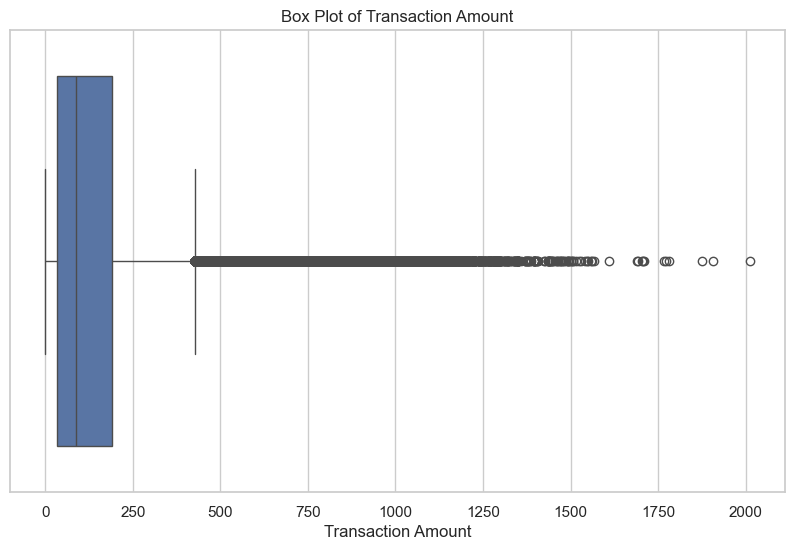

In [6]:
# Create a box plot to visualize the IQR and potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=transactionAmount_data)

# Add labels and title
plt.title(f'Box Plot of Transaction Amount')
plt.xlabel('Transaction Amount')

# Show the plot
plt.show()

In [7]:
transactionAmount_data.mean()

136.98579095150708

In [8]:
transactionAmount_data.median()

87.9